In [1]:
import scipy.io as scio
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
import math
import seaborn as sns

# Data Cleaning

In [2]:
boston_crime = pd.read_csv('/Users/zjallenjiang/Desktop/CS_542_Project/crime.csv', encoding = 'gbk')
boston_crime_dataset = boston_crime.values.tolist()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
for i in range(0, len(boston_crime_dataset)):
    val = boston_crime_dataset[i][6]
    if(val != val):
        boston_crime_dataset[i][6] = 'N'
print(len(boston_crime_dataset))

327820


In [4]:
boston_crime_df = pd.DataFrame(boston_crime_dataset)
boston_crime_df = boston_crime_df.dropna()
boston_crime_list = np.array(boston_crime_df).tolist()
print(len(boston_crime_list))
print(boston_crime_list[0])

304659
['I182080058', 2403, 'Disorderly Conduct', 'DISTURBING THE PEACE', 'E18', '495', 'N', '2018-10-03 20:13:00', 2018, 10, 'Wednesday', 20, 'Part Two', 'ARLINGTON ST', 42.26260773, -71.12118637, '(42.26260773, -71.12118637)']


In [5]:
boston_crime_list = [(offenseGroup, reportingArea, shooting, occurredDate, hour, day, month, year, street, lat, long) 
                     for (incidentNumber, offenseCode, offenseGroup, description, district, reportingArea, shooting, occurredDate,
                          year, month, day, hour, ucrPart, street, lat, long, latAndLong) in boston_crime_list]
print(boston_crime_list[0])

('Disorderly Conduct', '495', 'N', '2018-10-03 20:13:00', 20, 'Wednesday', 10, 2018, 'ARLINGTON ST', 42.26260773, -71.12118637)


In [6]:
boston_crime_df = pd.DataFrame(boston_crime_list)
boston_crime_df.columns = ['offenseGroup', 'reportingArea', 'shooting', 'occurredDate', 'hour', 'day', 'month', 'year', 'street', 'lat', 'long']

# Data Analysis

# Offense Group


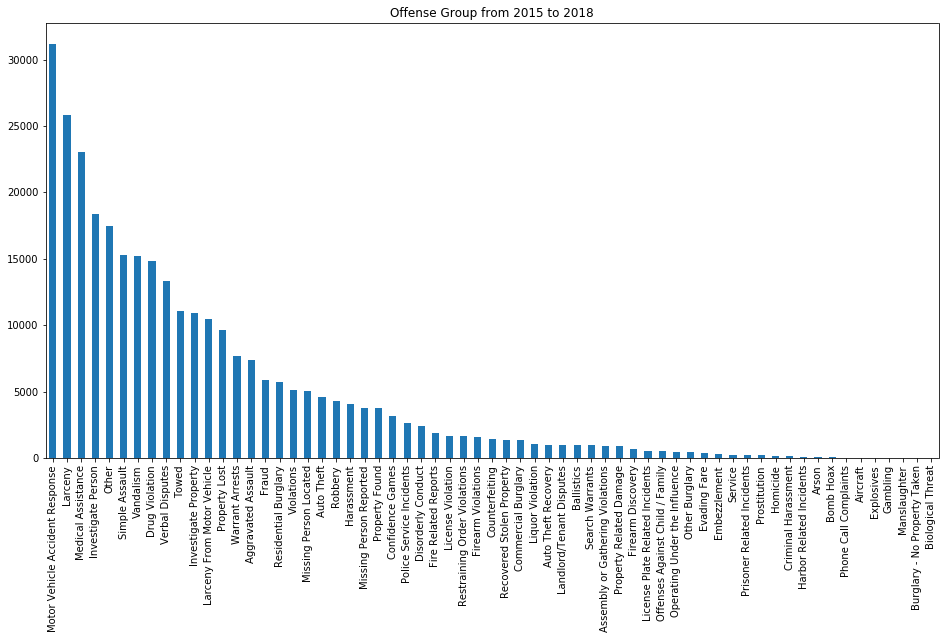

In [7]:
offense_group = boston_crime_df['offenseGroup'].unique()
plt.figure(figsize = (16,8))
boston_crime_df['offenseGroup'].value_counts().plot.bar()
plt.title('Offense Group from 2015 to 2018')
plt.show()

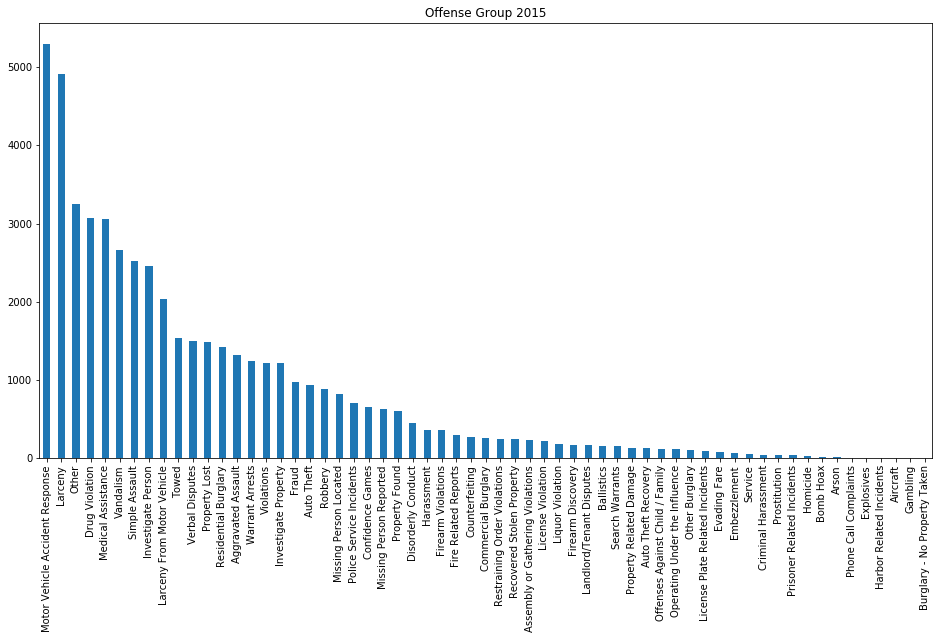

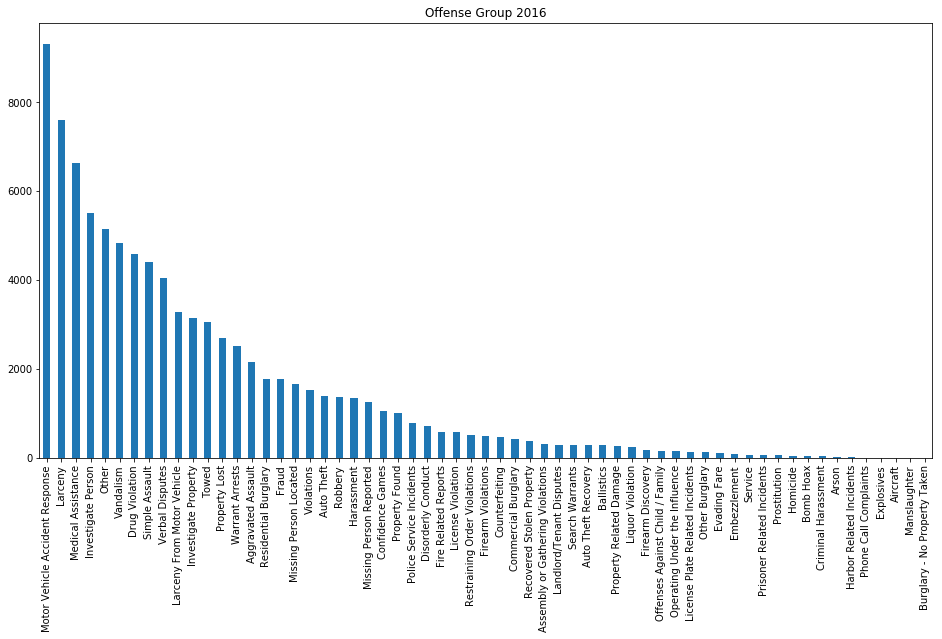

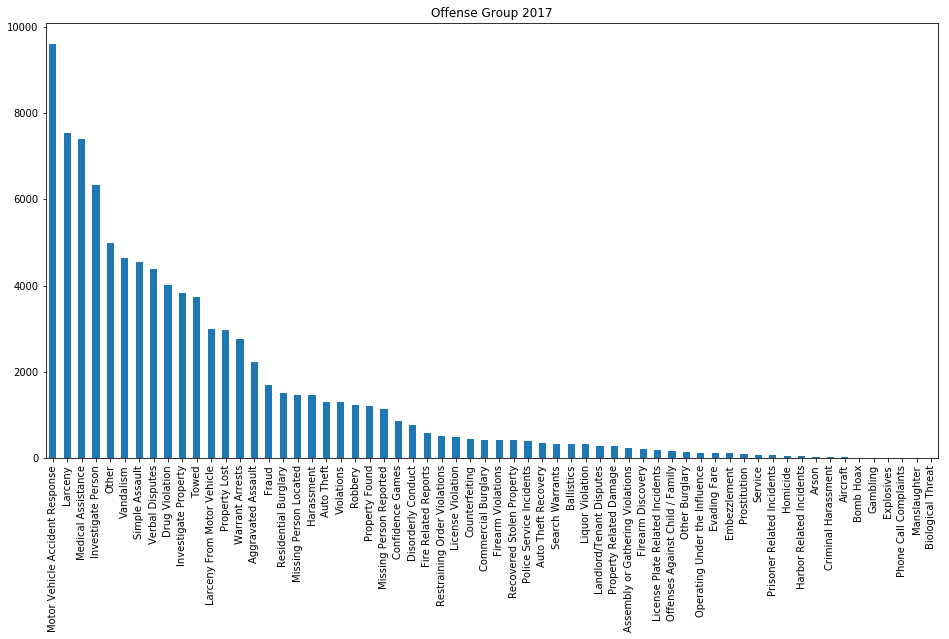

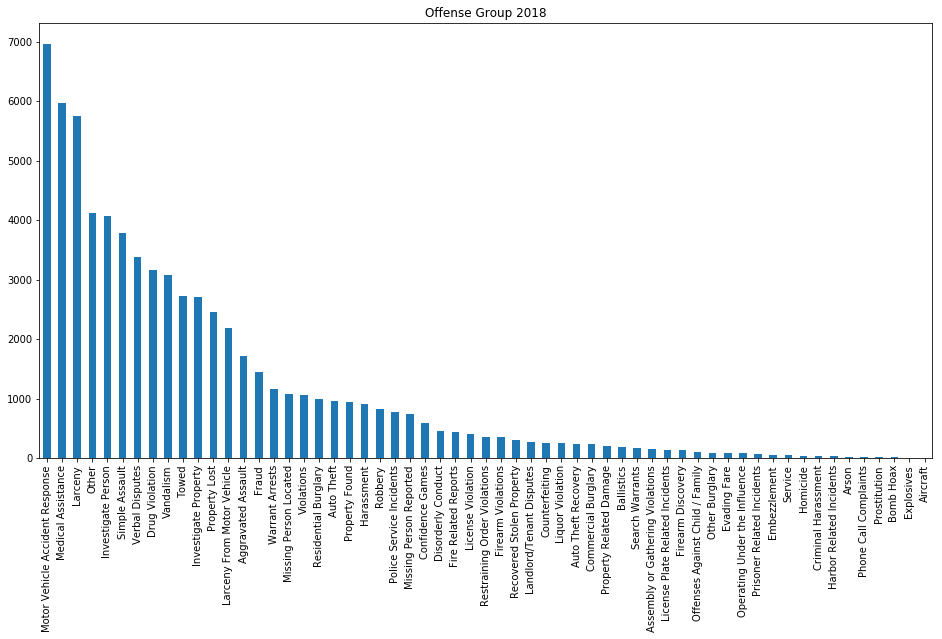

In [8]:
# 2015
plt.figure(figsize = (16,8))
boston_crime_df['offenseGroup'].loc[boston_crime_df['year'] == 2015].value_counts().plot.bar()
plt.title('Offense Group 2015')
plt.show()

# 2016
plt.figure(figsize = (16,8))
boston_crime_df['offenseGroup'].loc[boston_crime_df['year'] == 2016].value_counts().plot.bar()
plt.title('Offense Group 2016')
plt.show()

# 2017
plt.figure(figsize = (16,8))
boston_crime_df['offenseGroup'].loc[boston_crime_df['year'] == 2017].value_counts().plot.bar()
plt.title('Offense Group 2017')
plt.show()

# 2018
plt.figure(figsize = (16,8))
boston_crime_df['offenseGroup'].loc[boston_crime_df['year'] == 2018].value_counts().plot.bar()
plt.title('Offense Group 2018')
plt.show()

# Shooting

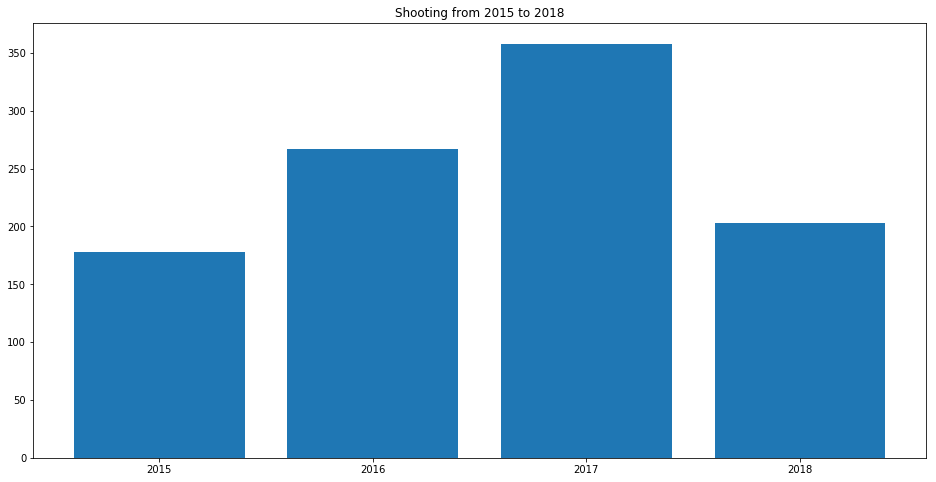

In [9]:
shooting = boston_crime_df['shooting'].unique()
shooting_Y = boston_crime_df.loc[boston_crime_df['shooting'] == 'Y']
shoot_2015 = len(shooting_Y.loc[shooting_Y['year'] == 2015])
shoot_2016 = len(shooting_Y.loc[shooting_Y['year'] == 2016])
shoot_2017 = len(shooting_Y.loc[shooting_Y['year'] == 2017])
shoot_2018 = len(shooting_Y.loc[shooting_Y['year'] == 2018])

shoot_year = '2015', '2016', '2017', '2018'
shoot_number = [shoot_2015, shoot_2016, shoot_2017, shoot_2018]

plt.figure(figsize = (16,8))
plt.bar(shoot_year, shoot_number)
plt.title('Shooting from 2015 to 2018')
plt.show()

# Hour

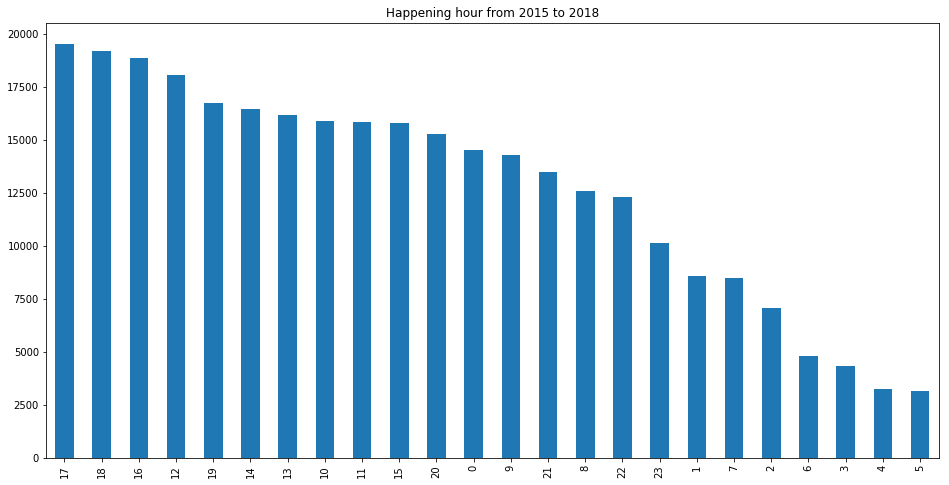

In [10]:
hour = boston_crime_df['hour'].unique()
plt.figure(figsize = (16,8))
boston_crime_df['hour'].value_counts().plot.bar()
plt.title('Happening hour from 2015 to 2018')
plt.show()

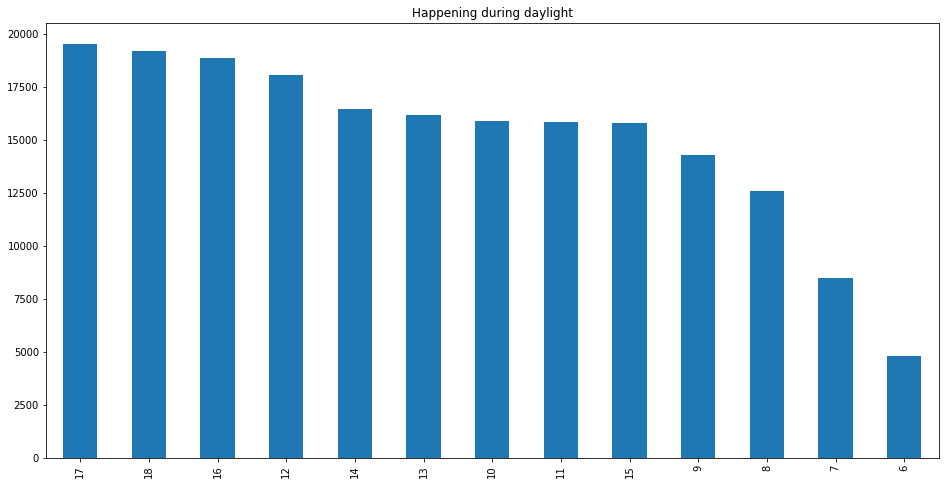

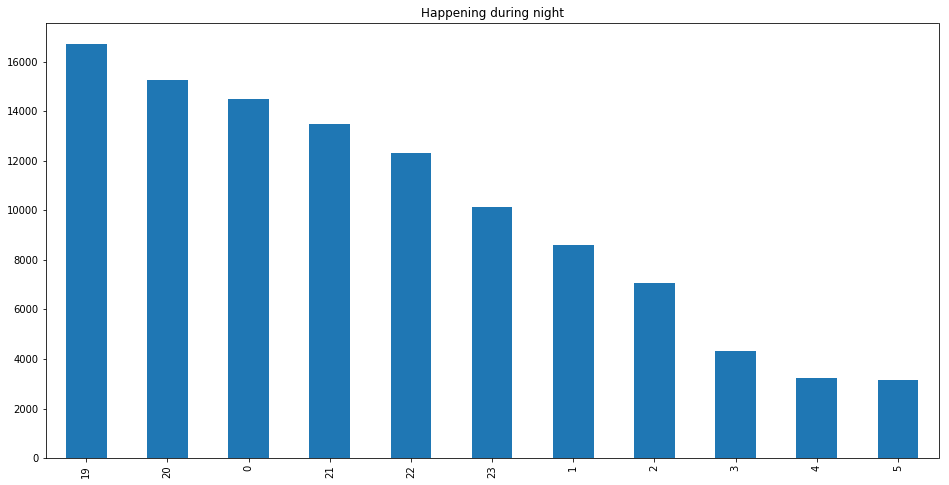

In [11]:
# daylight
plt.figure(figsize = (16,8))
crime_day = boston_crime_df['hour'].loc[(boston_crime_df['hour'] > 5) & (boston_crime_df['hour'] < 19)]
crime_day.value_counts().plot.bar()
plt.title('Happening during daylight')
plt.show()

# night
plt.figure(figsize = (16,8))
crime_day = boston_crime_df['hour'].loc[(boston_crime_df['hour'] < 6) | (boston_crime_df['hour'] > 18)]
crime_day.value_counts().plot.bar()
plt.title('Happening during night')
plt.show()

# Month

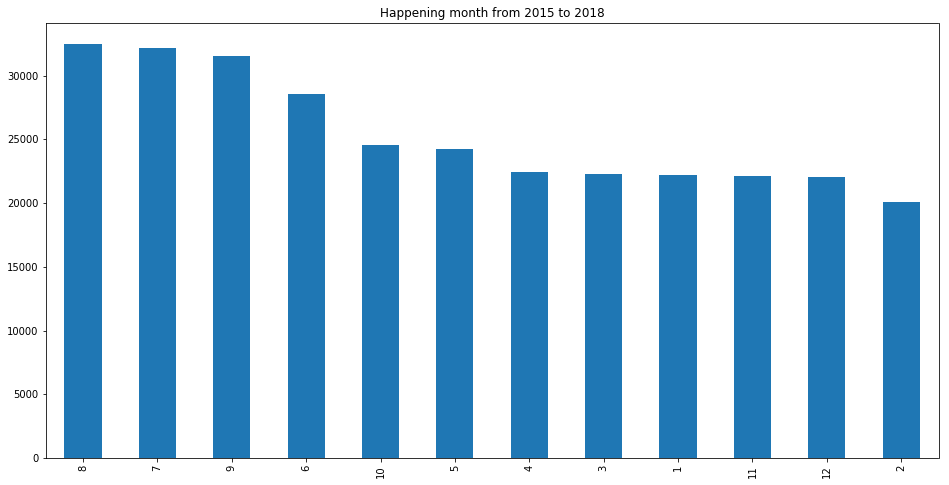

In [12]:
month = boston_crime_df['month'].unique()
plt.figure(figsize = (16,8))
boston_crime_df['month'].value_counts().plot.bar()
plt.title('Happening month from 2015 to 2018')
plt.show()

# Street

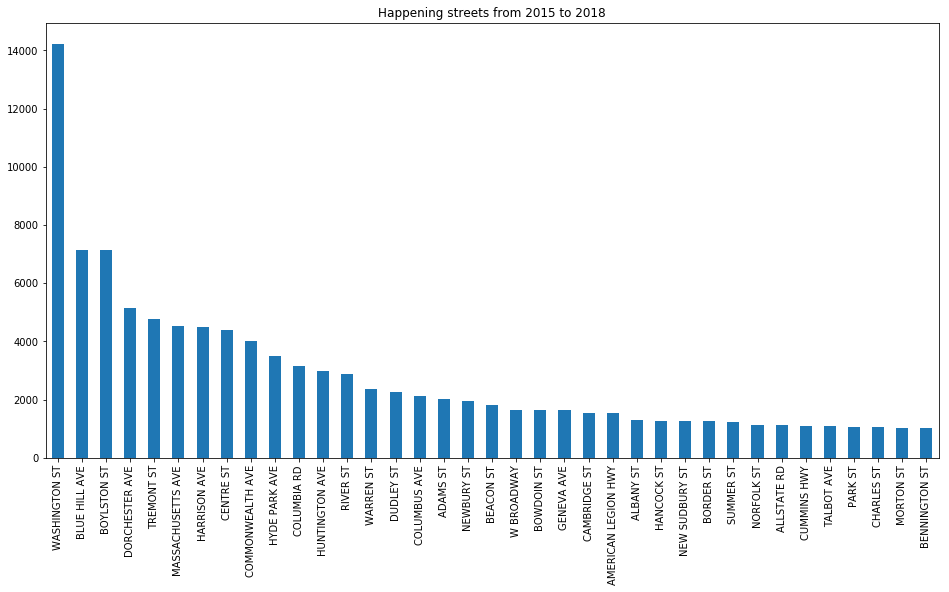

In [13]:
street = boston_crime_df['street'].unique()
plt.figure(figsize = (16,8))
count = boston_crime_df['street'].value_counts() 
count = count[count > 1000]
count.plot.bar()
plt.title('Happening streets from 2015 to 2018')
plt.show()

# Geographic place

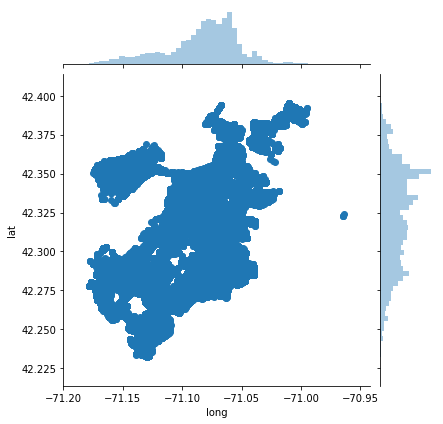

In [14]:
long_lat_df = boston_crime_df[['lat','long']]
long_lat_df = long_lat_df.loc[(long_lat_df['lat'] > 40) & (long_lat_df['long'] < -70)]
long_lat = sns.jointplot(x = long_lat_df['long'], y = long_lat_df['lat'], kind = 'scatter')

# Modeling